### Info 
MMO lab-2
IU5-21M, Denis Vasilev

### 0. Импорт библиотек и загрузка датасета

Для выполнения лабораторной работы был выбран набор данных о K-Pop группах

Источник: https://www.kaggle.com/datasets/nicolsalayoarias/kpop-groups-dataset

In [1]:
import plotly.express as px
from plotly import graph_objects

import seaborn as sns

import pandas as pd
pd.set_option('mode.chained_assignment', None)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [3]:
ds = pd.read_csv('kpopgroups.csv')

In [4]:
ds.head()

,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes
1,100%,NaN,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes
2,14U,NaN,원포유,Male,17/04/2017,BG,14,14,NaN,No
3,15&,NaN,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No
4,1TEAM,NaN,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No


### 1. Устранение пропусков в данных

In [5]:
cols_na = [c for c in ds.columns if ds[c].isnull().sum() > 0]
print(cols_na)

['Short', 'Debut', 'Company', 'Fanclub Name']


In [6]:
[(c, ds[c].isnull().mean()) for c in cols_na]

[('Short', 0.8755868544600939),
 ('Debut', 0.004694835680751174),
 ('Company', 0.002347417840375587),
 ('Fanclub Name', 0.6690140845070423)]

In [7]:
ds_drop = ds.drop(columns=['Short', 'Fanclub Name'])
ds_drop.head()

,Name,Korean Name,Gender,Debut,Company,Members,Orig Memb,Active
0,(G)I-DLE,(여자)아이들,Female,2/05/2018,Cube,5,6,Yes
1,100%,백퍼센트,Male,18/09/2012,TOP Media,4,7,Yes
2,14U,원포유,Male,17/04/2017,BG,14,14,No
3,15&,피프틴앤드,Female,5/10/2012,JYP,2,2,No
4,1TEAM,원팀,Male,27/03/2019,LiveWorks,5,5,No


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [9]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [12]:
Company_temp, _, _ = impute_column(ds_drop, 'Company', 'constant', fill_value_param='Missing')
ds_new_drop = ds_drop.copy()
ds_new_drop['Company'] = Company_temp

### 2. Кодирование категориальных признаков

In [14]:
ds_new_drop['Korean Name'] = ds_new_drop['Korean Name'].astype('category')
ds_new_drop['Korean Name'] = ds_new_drop['Korean Name'].cat.codes

ds_new_drop.head()

,Name,Korean Name,Gender,Debut,Company,Members,Orig Memb,Active
0,(G)I-DLE,0,Female,2/05/2018,Cube,5,6,Yes
1,100%,100,Male,18/09/2012,TOP Media,4,7,Yes
2,14U,288,Male,17/04/2017,BG,14,14,No
3,15&,405,Female,5/10/2012,JYP,2,2,No
4,1TEAM,287,Male,27/03/2019,LiveWorks,5,5,No


### 3. Нормализация числовых признаков

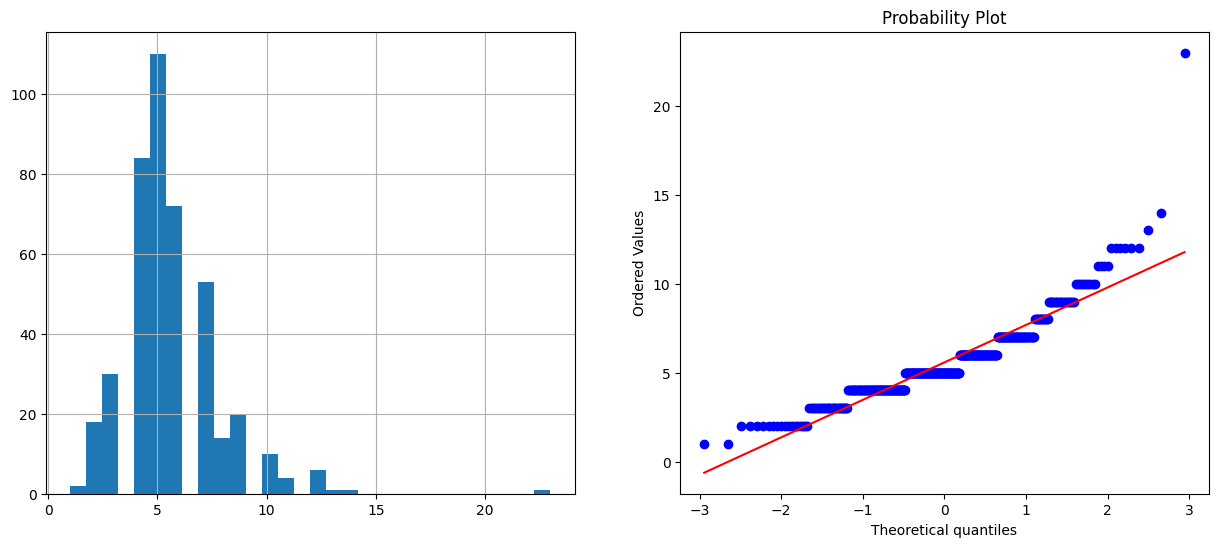

In [10]:
diagnostic_plots(ds, 'Members')

Param is equal to 0.04521882172885903


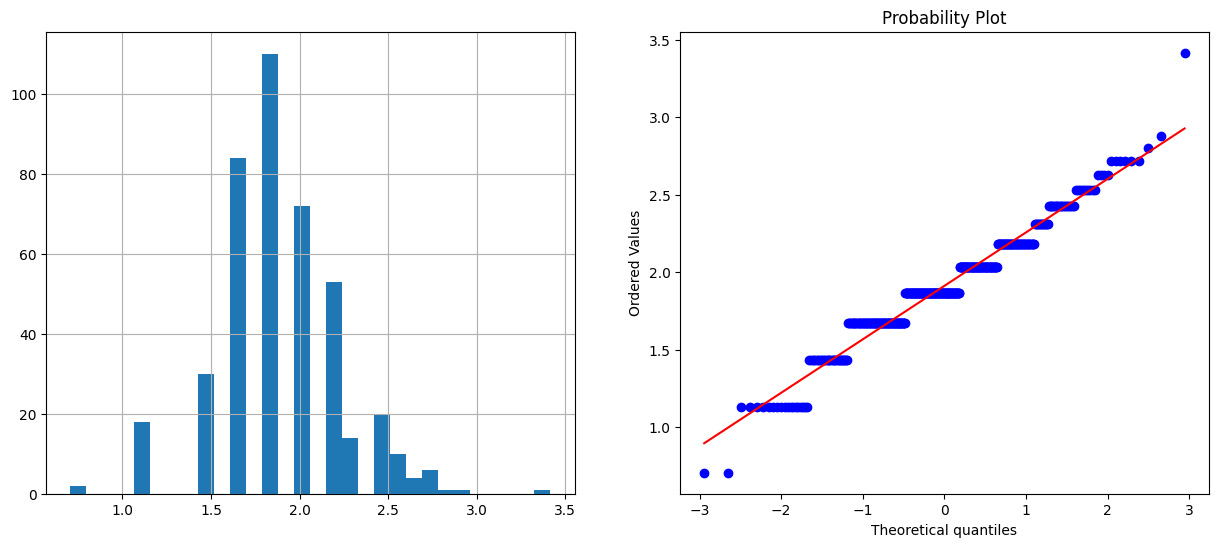

In [11]:
ds['Members'] = ds['Members'].astype('float')
ds['Members_yeo'], param = stats.yeojohnson(ds['Members'])
print (f"Param is equal to {param}")
diagnostic_plots(ds, 'Members_yeo')